In [201]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.prob import ProbabilityAnalysis
from src.plots import plot_volatilities, plot_prob_evolution
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 10 # days

date_of_reckoning = datetime(2019,7,10)

probability_analysis = ProbabilityAnalysis(data_path, data_deputados_path)
probability_analysis = probability_analysis.get_timeframes(lag= lag, day_of_reckoning=date_of_reckoning)

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()
tau = probability_analysis.get_all_statements_per_politician(267)


In [213]:

high_volatility_ids = probability_analysis.get_high_statement_volatility_politicians()
from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info = probability_analysis.get_high_statement_volatility_info()

In [216]:
high_volatility_politican_info

[     Unnamed: 0 Partido     Estado                    NOME  Id_politico
 477         477      SD  São Paulo  PAULO PEREIRA DA SILVA          477,
      Unnamed: 0 Partido     Estado            NOME  Id_politico
 470         470     PRB  São Paulo  MARCOS PEREIRA          470,
      Unnamed: 0 Partido        Estado         NOME  Id_politico
 195         195     PHS  Minas Gerais  MARCELO ARO          195,
     Unnamed: 0 Partido Estado            NOME  Id_politico
 74          74    PROS  Ceará  CAPITAO WAGNER           74,
      Unnamed: 0 Partido    Estado        NOME  Id_politico
 135         135     PDT  Maranhão  GIL CUTRIM          135,
     Unnamed: 0 Partido Estado       NOME  Id_politico
 48          48     PRB  Bahia  JOAO ROMA           48,
      Unnamed: 0 Partido      Estado               NOME  Id_politico
 286         286      PP  Pernambuco  FERNANDO MONTEIRO          286,
      Unnamed: 0 Partido  Estado          NOME  Id_politico
 267         267     PPS  Paraná  RUBEN

running models at different timecuts


In [217]:
from_time_cut_to_probability = probability_analysis.get_politician_probability_evolution(lambd, delta,  id_politico = 428 )

0it [00:00, ?it/s]

distance to reckoning is greater than total time in current iteration of time_cut 2019-01-01 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-01-11 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-01-21 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-01-31 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-02-10 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-02-20 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-03-02 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-03-12 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 2019-03-22 17:36:46
distance to reckoning is greater than total time in current iteration of time_cut 

100%|██████████| 110/110 [00:01<00:00, 68.03it/s]
12it [00:01,  7.37it/s]

running sliding window


100%|██████████| 120/120 [00:01<00:00, 69.78it/s]
13it [00:03,  3.28it/s]

running sliding window


100%|██████████| 130/130 [00:01<00:00, 70.96it/s]
14it [00:05,  1.97it/s]

running sliding window


100%|██████████| 140/140 [00:01<00:00, 82.62it/s]
15it [00:06,  1.43it/s]

running sliding window


100%|██████████| 150/150 [00:01<00:00, 87.17it/s]
16it [00:08,  1.13it/s]

running sliding window


100%|██████████| 160/160 [00:01<00:00, 97.14it/s]
17it [00:10,  1.05s/it]

running sliding window


100%|██████████| 170/170 [00:01<00:00, 121.81it/s]
18it [00:11,  1.13s/it]

running sliding window


100%|██████████| 180/180 [00:01<00:00, 156.86it/s]
19it [00:12,  1.48it/s]


In [218]:
from_time_cut_to_probability

{Timestamp('2019-04-21 17:36:46'): {'A': 0.2636363636363636,
  'O': 0.7363636363636363},
 Timestamp('2019-05-01 17:36:46'): {'A': 0.24166666666666667,
  'O': 0.7583333333333333},
 Timestamp('2019-05-11 17:36:46'): {'A': 0.2230769230769231,
  'O': 0.7769230769230769},
 Timestamp('2019-05-21 17:36:46'): {'A': 0.21641791044776118,
  'O': 0.7835820895522388},
 Timestamp('2019-05-31 17:36:46'): {'A': 0.21641791044776118,
  'O': 0.7835820895522388},
 Timestamp('2019-06-10 17:36:46'): {'A': 0.21641791044776118,
  'O': 0.7835820895522388},
 Timestamp('2019-06-20 17:36:46'): {'A': 0.3333333333333333,
  'O': 0.6666666666666666},
 Timestamp('2019-06-30 17:36:46'): {'A': 0.4262295081967213,
  'O': 0.5737704918032787}}

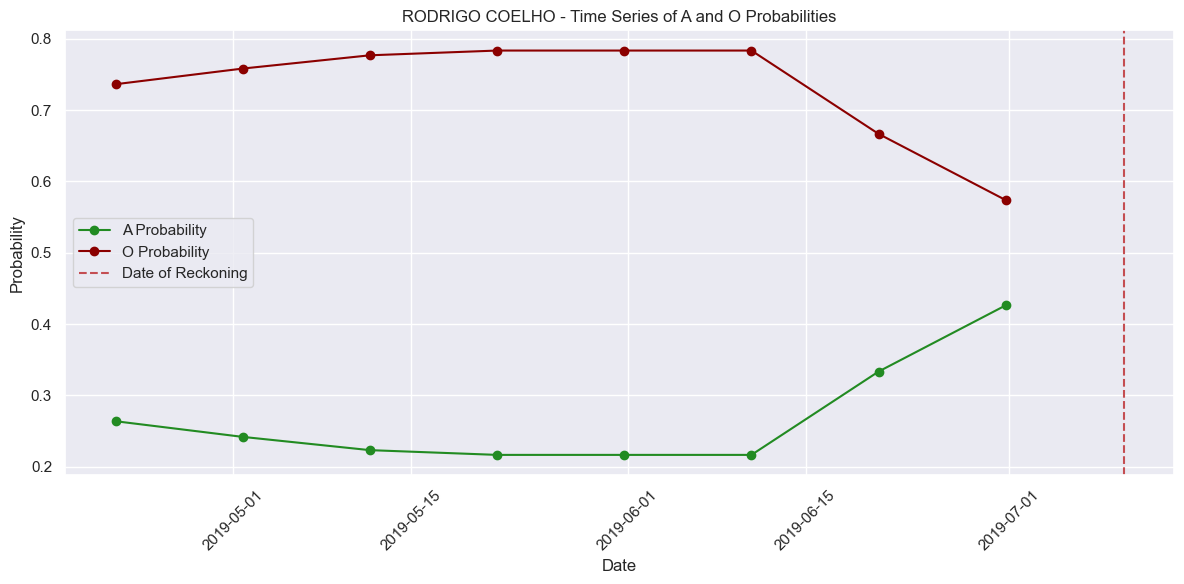

In [219]:

plot_prob_evolution(from_time_cut_to_probability, date_of_reckoning=date_of_reckoning, name = from_id_to_name_high_vol[428])

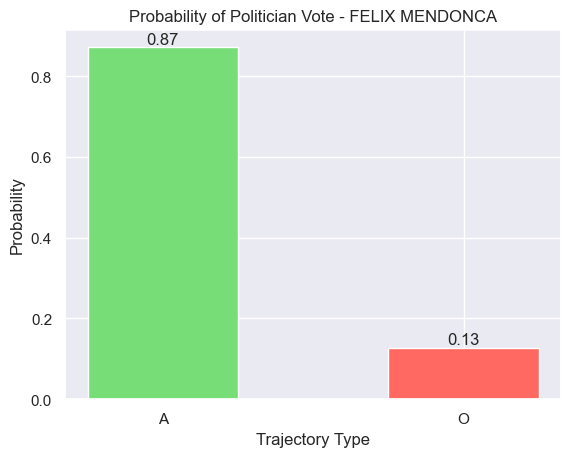

In [19]:
# set_probability
bars = plt.bar(set_probability.keys(), set_probability.values(), width=0.5, color=['#77dd77', '#ff6961'])
plt.xlabel('Trajectory Type')
plt.ylabel('Probability')
plt.title('Probability of Politician Vote - ' + probability_analysis.get_politician_names()[267])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [193]:
df = pd.read_csv("data/DATA_FINAL.csv")
df.time = pd.to_datetime(df.time)
df = df.sort_values(by=['time'])

In [194]:
tau = crop_statements_until_t_by_politician(df,'2019-07-11 15:30:16', 491)

In [196]:
print(tau)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]


In [ ]:

data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

probability_analysis = ModelStats(data_path, data_deputados_path)

lambd = 0.6
delta = 0.3
lag = 10


In [8]:
probability_analysis  = probability_analysis.get_votes(lambd, delta, lag, datetime(2020,1,1))

19it [00:00, 63.74it/s]


In [9]:
from datetime import datetime
from dataclasses import dataclass
from typing import List

@dataclass
class PoliticianOpinion:
    politician_name: str
    opinion_score: float

@dataclass
class PoliticiansOpinionInTime:
    politician_opinions: List[PoliticianOpinion]
    datetime: datetime

def get_politician_trajectories(opinions_in_time: List[PoliticiansOpinionInTime], politician_name: str):
    """
    Get all different trajectories of opinions for a single politician.

    Parameters:
    - opinions_in_time: List of PoliticiansOpinionInTime instances.
    - politician_name: The name of the politician.

    Returns:
    - A list of trajectories for the specified politician.
    """
    politician_trajectories = []

    # Iterate through the list of opinions_in_time
    for opinion_in_time in opinions_in_time:
        datetime_point = opinion_in_time.datetime
        # Find the politician's opinion at this datetime_point
        politician_opinion = next((opinion.opinion_score for opinion in opinion_in_time.politician_opinions
                                   if opinion.politician_name == politician_name), None)

        if politician_opinion is not None:
            # Append the datetime_point and opinion to the trajectories
            politician_trajectories.append((datetime_point, politician_opinion))

    return politician_trajectories

# Example usage:
opinions_data = [
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.8), PoliticianOpinion("Politician2", 0.5)], datetime(2023, 1, 1)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.7), PoliticianOpinion("Politician2", 0.6)], datetime(2023, 1, 2)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.6), PoliticianOpinion("Politician2", 0.7)], datetime(2023, 1, 3)),
]

politician_name_to_check = "Politician1"
trajectories = get_politician_trajectories(opinions_data, politician_name_to_check)

print(f"Opinion trajectories for {politician_name_to_check}: {trajectories}")


Opinion trajectories for Politician1: [(datetime.datetime(2023, 1, 1, 0, 0), 0.8), (datetime.datetime(2023, 1, 2, 0, 0), 0.7), (datetime.datetime(2023, 1, 3, 0, 0), 0.6)]


In [ ]:
@dataclass
class OpinionHistogram:
    """Class for identifying a single politician opinion"""
    bins: list[int]
    opinion: list[int] 

@dataclass
class ScoreHistogram:
    """Class for identifying a single politician opinion"""
    politician_id: list[int]
    opinion: list[int]